In [8]:
# Imports

import tensorflow as tf 
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np 

import matplotlib.pyplot as plt 


In [3]:
# Import Images

IMG_SIZE = 254
BATCH_SIZE = 32

train_path = "DataSplit/train"
validation_path = "DataSplit/val"
test_path = "DataSplit/test"

img_rescale = ImageDataGenerator(
    rescale = 1./255
)

train_data_augmentation = ImageDataGenerator( # Define params for data augmentation. Reduces overfitting 
    rescale = 1./255,
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True
)

train_gen = train_data_augmentation.flow_from_directory(
    train_path, 
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "binary"
)

val_gen = img_rescale.flow_from_directory(
    validation_path, 
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "binary"
)

test_gen = img_rescale.flow_from_directory(
    test_path, 
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "binary"
)

Found 9665 images belonging to 2 classes.
Found 2070 images belonging to 2 classes.
Found 2073 images belonging to 2 classes.


Labels / Class Indices: {'COVID': 0, 'Normal': 1}


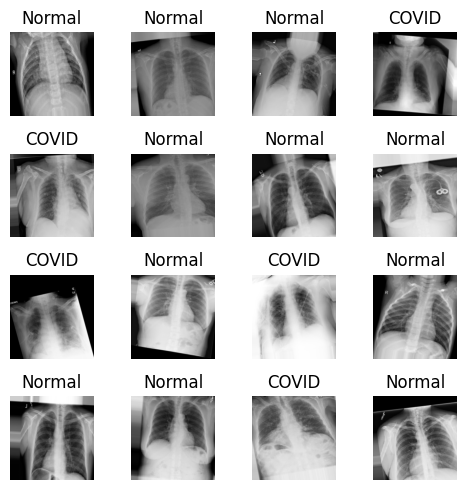

In [15]:
# Visualize Images

print("Labels / Class Indices:", train_gen.class_indices) # Covid = 0, Normal = 1

images, labels = next(train_gen) # Get one batch 

plt.figure(figsize = (5, 5))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    label = "COVID" if labels[i] == 0 else "Normal"
    plt.title(label)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [4]:
# Create CNN Model

model = models.Sequential([

    # Input Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2 ,2), 

    # Hidden Layer 1
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2 ,2), 

    # Hidden Layer 2
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.3),

    # Output Layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid'), # Binary output 
])

# Compile the model 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/Users/taniarizwan/Desktop/CovidPrediction/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 252, 252, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     7,372,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,466,177 (28.48 MB)

 Trainable params: 7,466,177 (28.48 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model

history = model.fit(
    train_gen,
    validation_data = val_gen,
    epochs = 10
)

Epoch 1/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 328s 1s/step - accuracy: 0.7391 - loss: 0.5371 - val_accuracy: 0.7377 - val_loss: 0.4862
Epoch 2/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 318s 1s/step - accuracy: 0.7691 - loss: 0.4723 - val_accuracy: 0.7710 - val_loss: 0.4496
Epoch 3/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 271s 891ms/step - accuracy: 0.8063 - loss: 0.4179 - val_accuracy: 0.8396 - val_loss: 0.3539
Epoch 4/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 298s 983ms/step - accuracy: 0.8233 - loss: 0.3806 - val_accuracy: 0.8696 - val_loss: 0.2891
Epoch 5/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 306s 1s/step - accuracy: 0.8438 - loss: 0.3492 - val_accuracy: 0.8662 - val_loss: 0.3174
Epoch 6/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 224s 739ms/step - accuracy: 0.8567 - loss: 0.3293 - val_accuracy: 0.9092 - val_loss: 0.2372
Epoch 7/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 224s 738ms/step - accuracy: 0.8643 - loss: 0.3138 - val_accuracy: 0.8961 - val_loss: 0.2418
Epoch 8/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 218s 719ms/step - accuracy: 0.8602 - loss: 0.

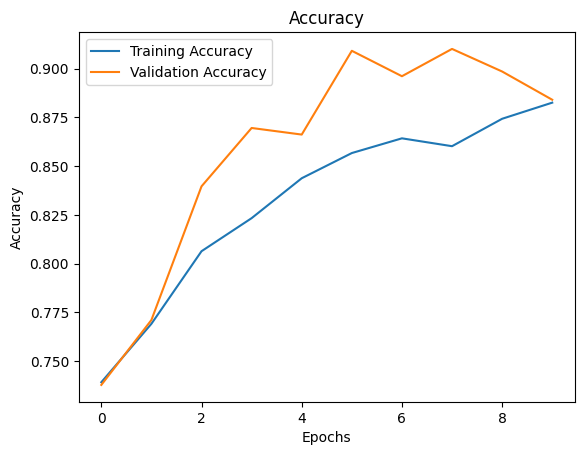

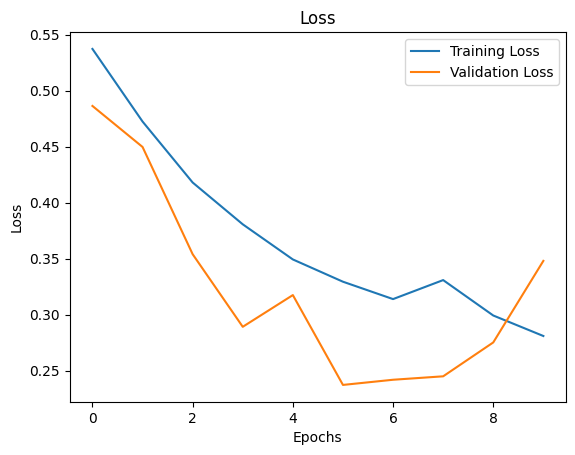

In [10]:
# Visualize performance

# Accuracy plot
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.show()

# Loss plot
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss")
plt.show()

65/65 ━━━━━━━━━━━━━━━━━━━━ 15s 229ms/step


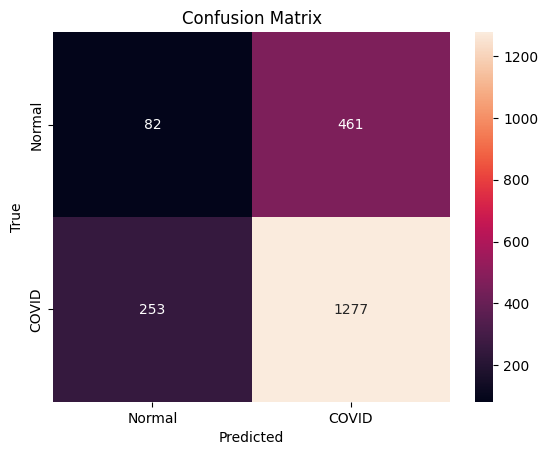

              precision    recall  f1-score   support

      Normal       0.24      0.15      0.19       543
       COVID       0.73      0.83      0.78      1530

    accuracy                           0.66      2073
   macro avg       0.49      0.49      0.48      2073
weighted avg       0.61      0.66      0.63      2073



In [11]:
# Plot Confusion Matrix

y_true = test_gen.classes
y_pred_probabilities = model.predict(test_gen) # Let model predict on test data
y_pred = (y_pred_probabilities > 0.5).astype(int)

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["Normal", "COVID"], yticklabels=["Normal", "COVID"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred, target_names = ["Normal", "COVID"]))
